# STUDENT PERFORMANCE PREDICTION

### STEPS

* Understanding the problem statement
* Data Collection
* Data Validation
* Exploratory data analysis
* Data pre-processing and Feature Engineering
* Model training
* Choosing the best model

### 1. Problem Statement

* In this problem we will try to predict how student's performance (on test), is affected by other varaiables such as: Parental level of education, wether they bring lunch or not at school, Test preparation, and others

### 2. Data collection

* Data source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* column and 1000 rows

### 2.1 Import required packages and data

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [9]:
df= pd.read_csv('stud.csv')

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 2.2 Data info

* gender : Male/Female
* Race: Group A, B, C, D, E 
* Parental level of education : Bachelor degree, Some college, Master's degree, Associate, Highschool
* Lunch: Lunch before test : Standard, Free/reduced
* Test preparation course: Complete or not complete before test
* Math score
* Reading score
* Writing score


### 3. checks to perform

* Check Missing Values
* Dublicates
* Data type
* Unique values
* statistics
* categories in different categorical column

In [15]:
# Checking missig value

df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

They are no null values in the dataset

In [16]:
#checking for duplicates
df.duplicated().sum()

0

They are no duplicates in the data

In [11]:
# looking at info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.shape

(1000, 8)

In [17]:
# Checking the data types
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [19]:
#checking number of unique values

df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [20]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 3.2 Insight

From the above description : 
* All the means are below 70, efforts and innovations has to be made in order to be competitive internationally
* The Standard deviation, is similar accros Subjects.
* Math is the only subject where we have 0 as minimum, it would be worth looking into it as it could be due to errors, or outliers

* Top Performers, The maximum scores (100 in all subjects) suggest the presence of high-achieving students. Identifying the characteristics or factors contributing to their success could be insightful.

## Exploring the data 

### Univariate Analysis

In [43]:
cat_cols1=df.select_dtypes(include=['object'])
cat_cols= cat_cols1.columns.to_list()
cat_cols

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [45]:
for catcol in cat_cols:
    x=df[catcol].unique()
    print(f"number of unique value in {catcol} is {x}")

number of unique value in genderis ['female' 'male']
number of unique value in race_ethnicityis ['group B' 'group C' 'group A' 'group D' 'group E']
number of unique value in parental_level_of_educationis ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
number of unique value in lunchis ['standard' 'free/reduced']
number of unique value in test_preparation_courseis ['none' 'completed']


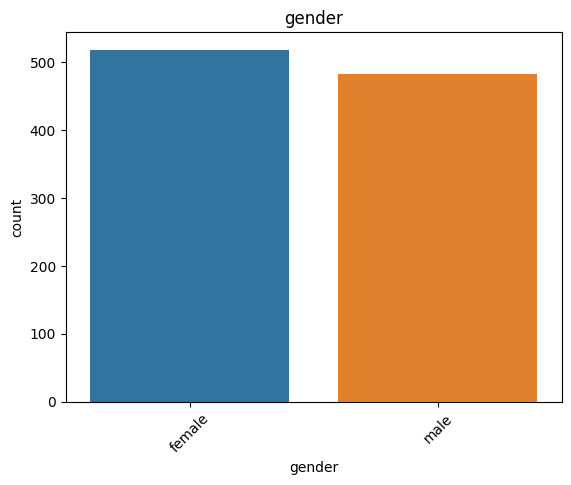

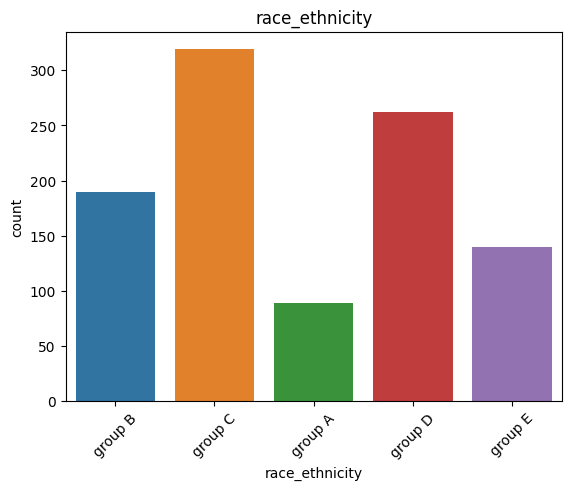

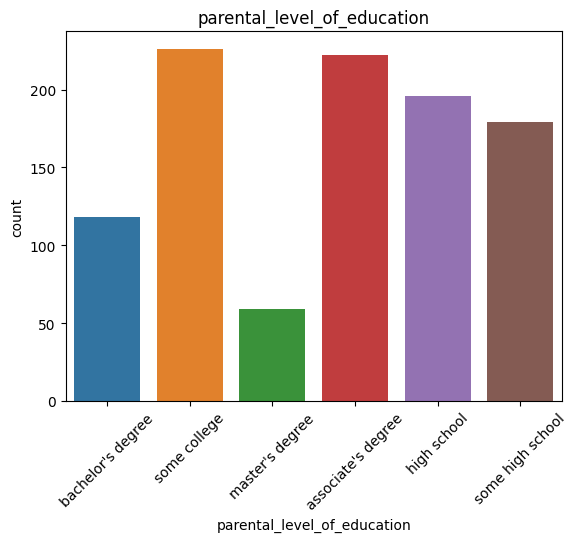

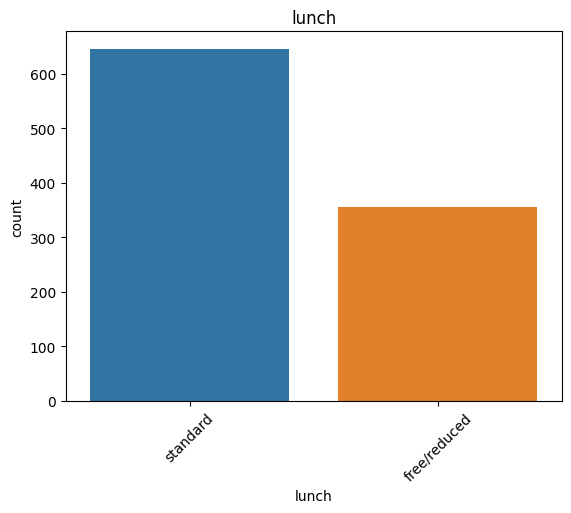

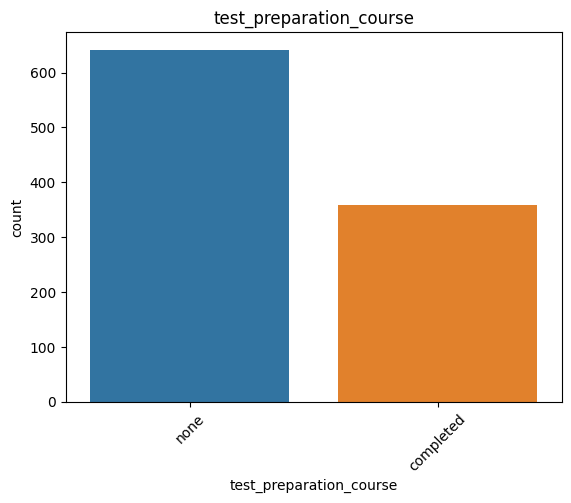

In [56]:
for cat_col in cat_cols:

    plt.xticks(rotation=45)
    sns.countplot(data = df, x= df[cat_col], hue= cat_col)
    plt.title(cat_col)
    plt.show()
    

In [59]:
int_cols1=df.select_dtypes(include=['int64'])
int_cols= int_cols1.columns.to_list()
int_cols

['math_score', 'reading_score', 'writing_score']

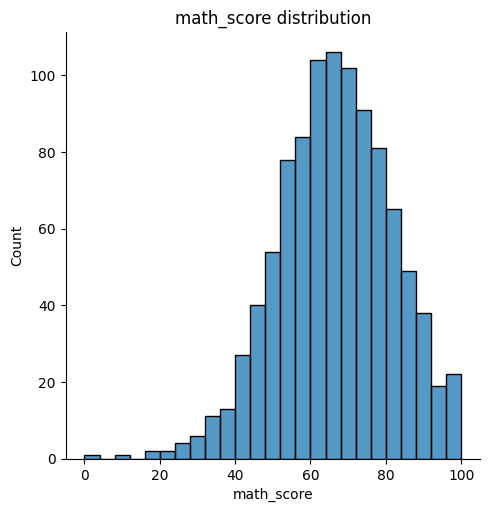

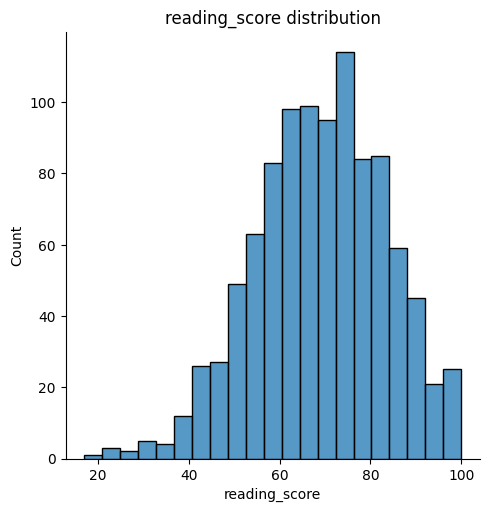

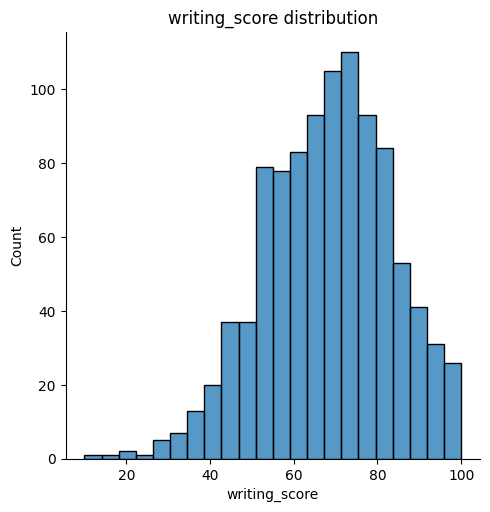

In [62]:
for int_col in int_cols:

    
    sns.displot(data = df, x= df[int_col])
    plt.title(f"{int_col} distribution")
    plt.show()

## Bivariate Analysis

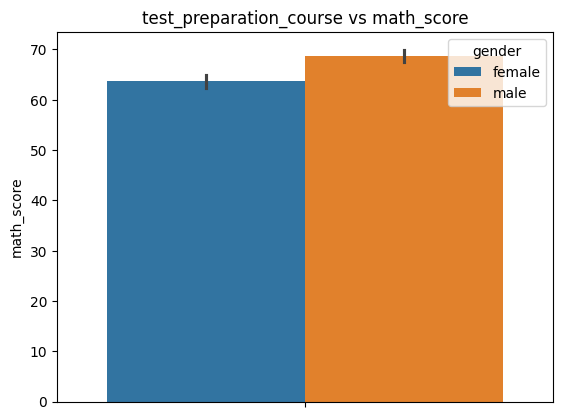

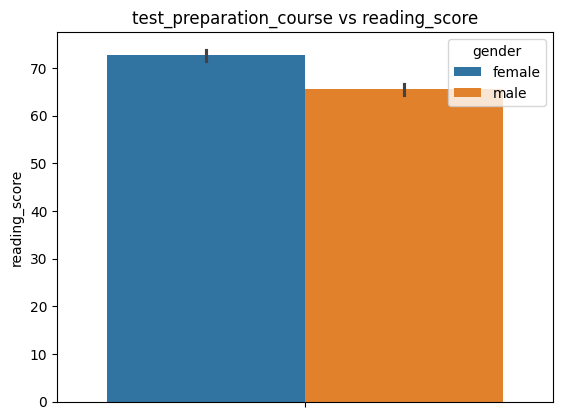

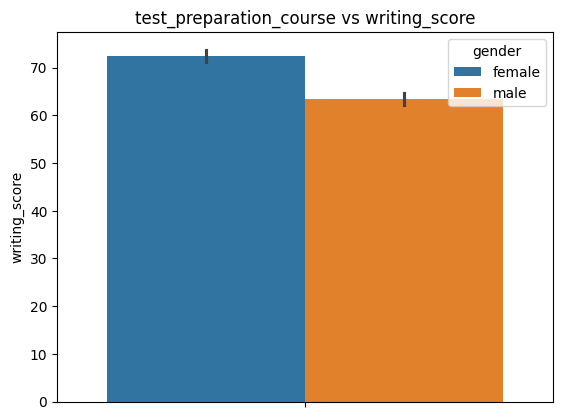

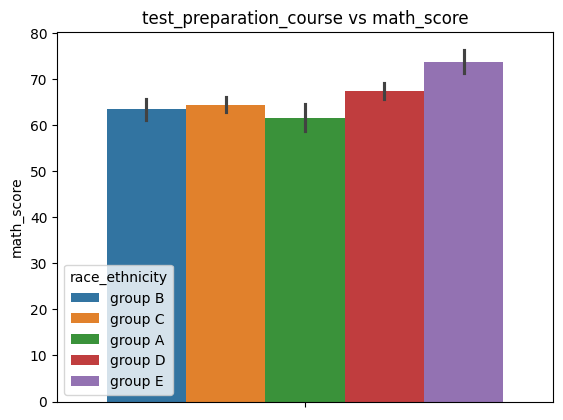

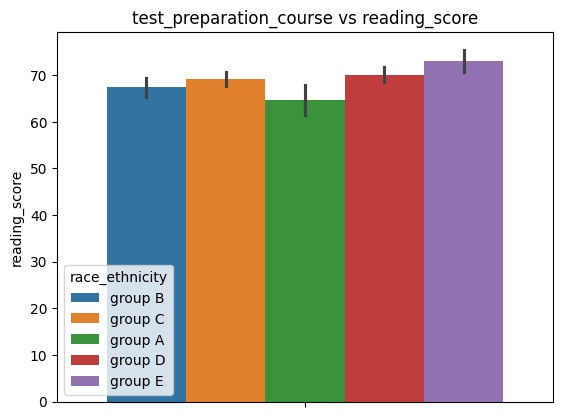

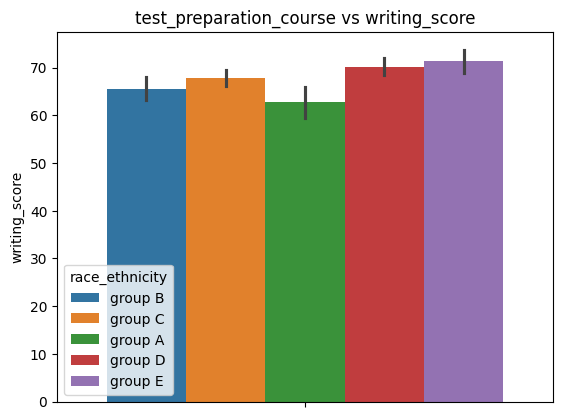

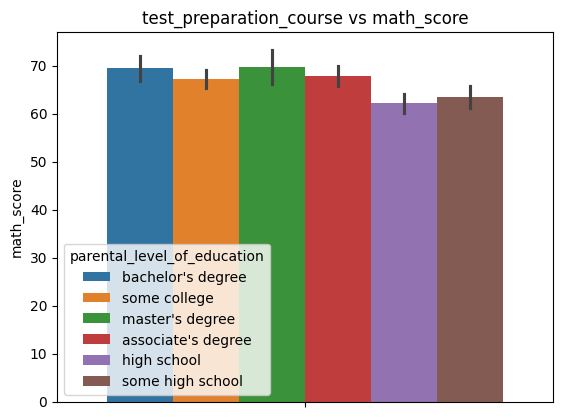

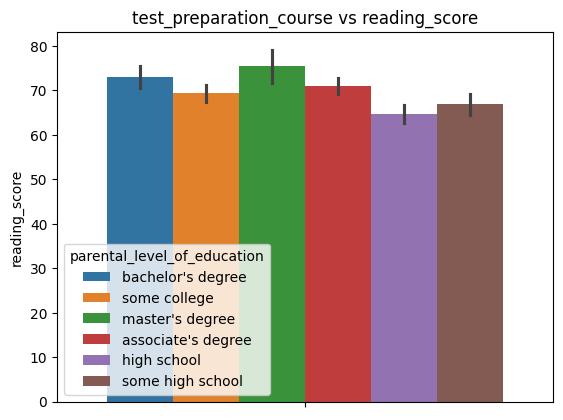

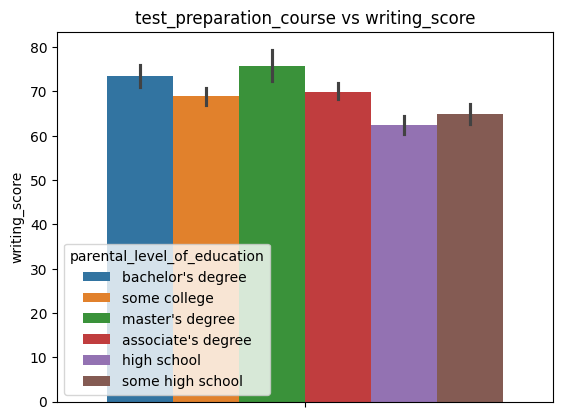

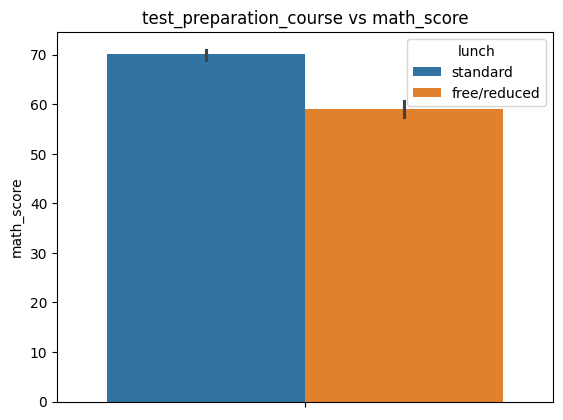

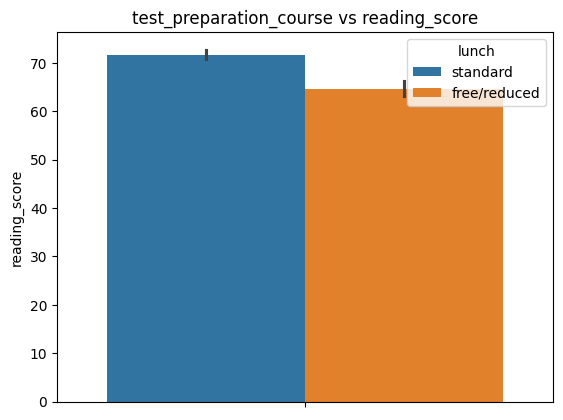

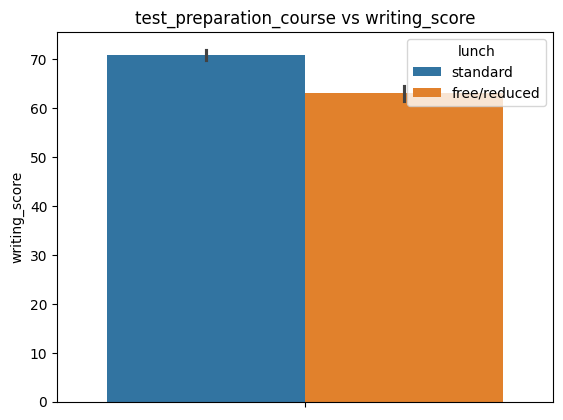

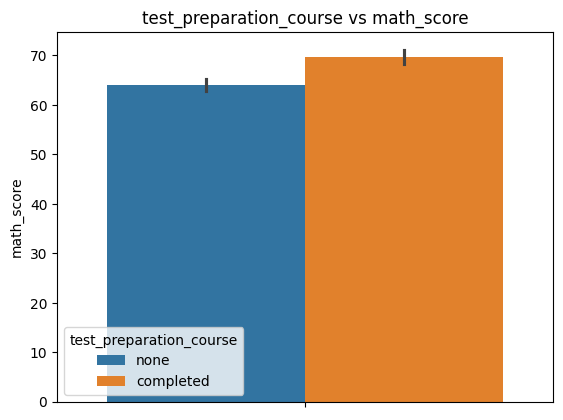

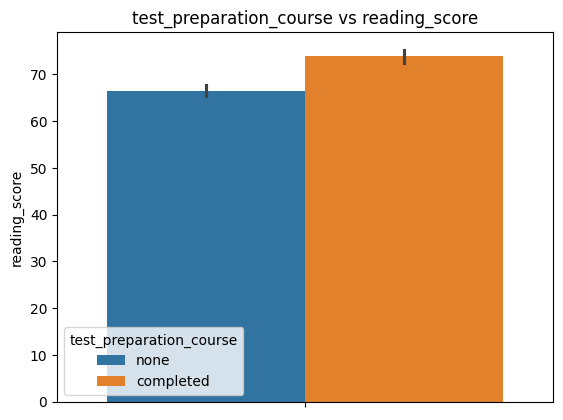

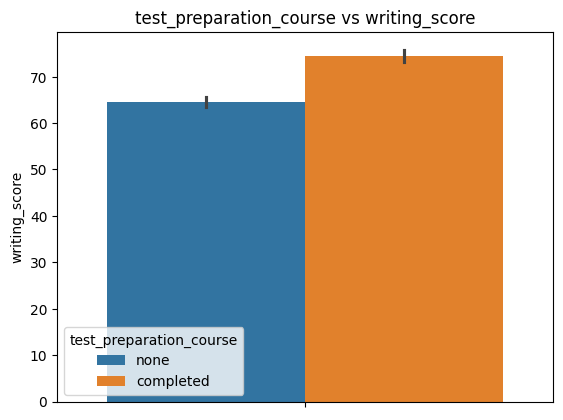

In [66]:
for catcol in cat_cols:
    for int_col in int_cols:
        sns.barplot(data = df, y=df[int_col], hue=catcol)
        plt.title(f"{cat_col} vs {int_col}")
        plt.show()

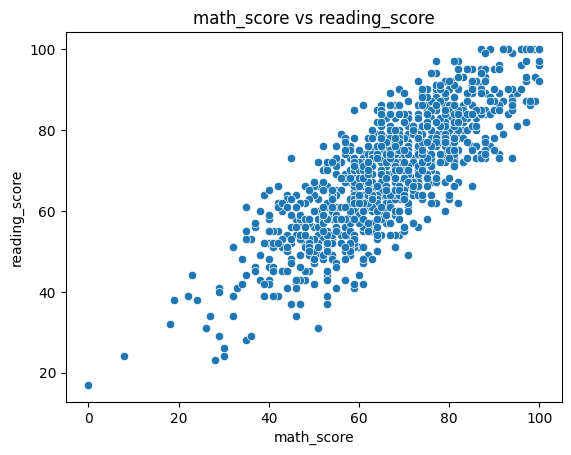

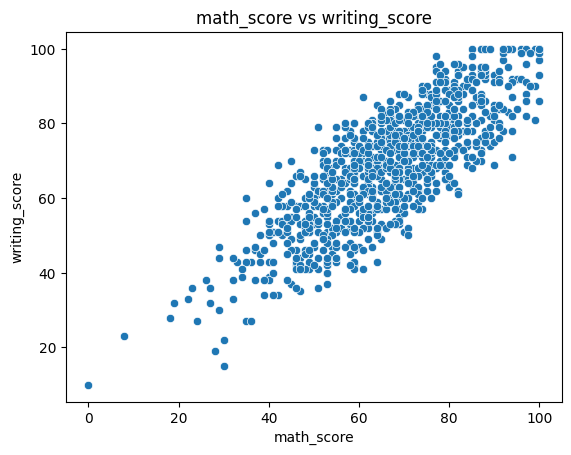

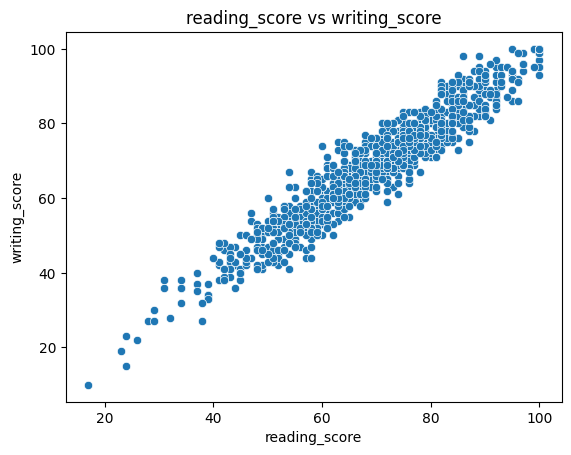

In [70]:
for i in range(len(int_cols)):
    for j in range(i + 1, len(int_cols)):  # Start from i+1 to avoid comparing a column to itself
        int_col1 = int_cols[i]
        int_col2 = int_cols[j]

        sns.scatterplot(data=df, x=int_col1, y=df[int_col2])
        plt.title(f"{int_col1} vs {int_col2}")
        plt.show()

### Lookind at the students with perfect score in math vs the students under de mean


In [72]:
#how man student do we have with perfect sscore in math

df100 = df[df['math_score']==100]
df100

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100


### Insights
* No observable bias between male and female
* group E ethnicity are predominantly the one with the highest math score
* students with 100 in math do very well on other subjects
* As seen in parental education level vs scores, children with parents with higher education tend to do better, but they're are not necesarily the best students
* The The best students does not always finish the test prep course


In [74]:
df0 = df[df['math_score']<df['math_score'].mean()]
df0

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
3,male,group A,associate's degree,free/reduced,none,47,57,44
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50
10,male,group C,associate's degree,standard,none,58,54,52
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
994,male,group A,high school,standard,none,63,63,62
996,male,group C,high school,free/reduced,none,62,55,55


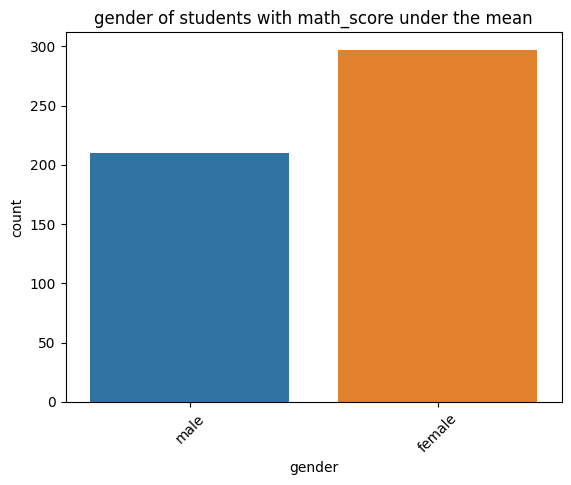

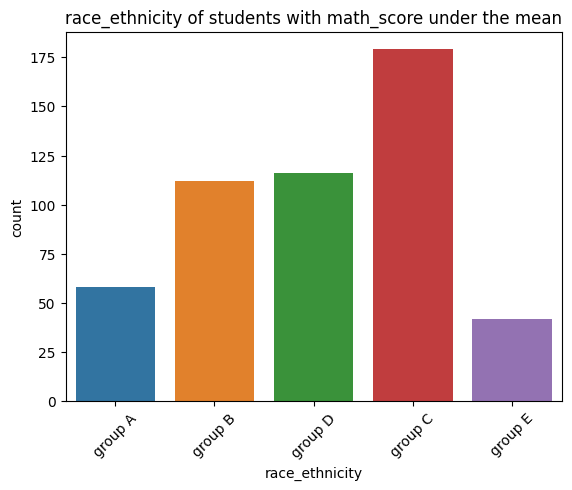

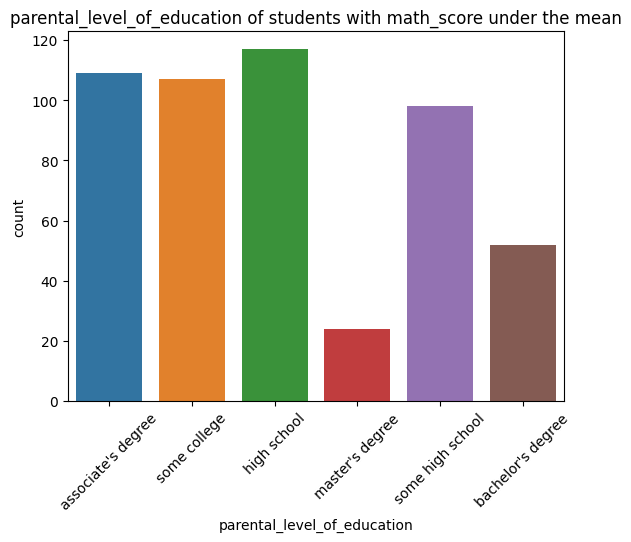

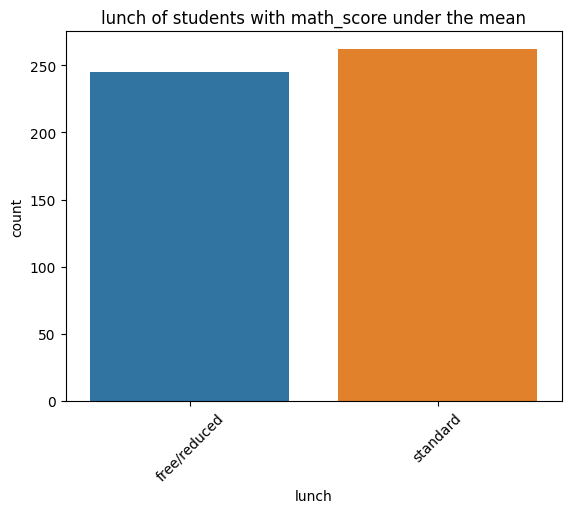

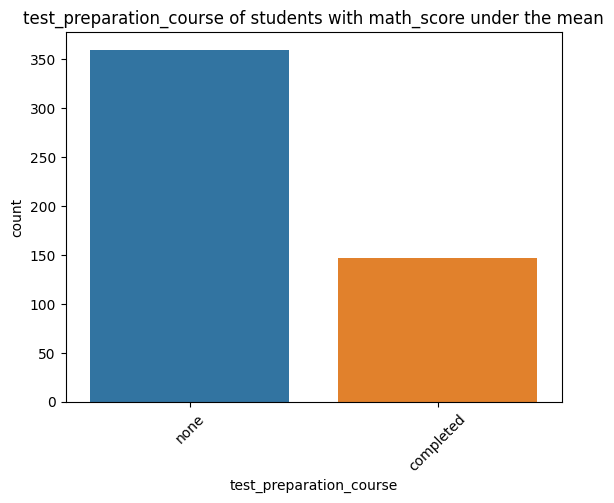

In [78]:
for cat_col in cat_cols:

    plt.xticks(rotation=45)
    sns.countplot(data = df0, x= df0[cat_col], hue= cat_col)
    plt.title(f"{cat_col} of students with math_score under the mean")
    plt.show()
    

## Adding columns for total score and average score

In [79]:
df['total score']= df['math_score'] +df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Visualizing score distribution using the new aggregations total score and average

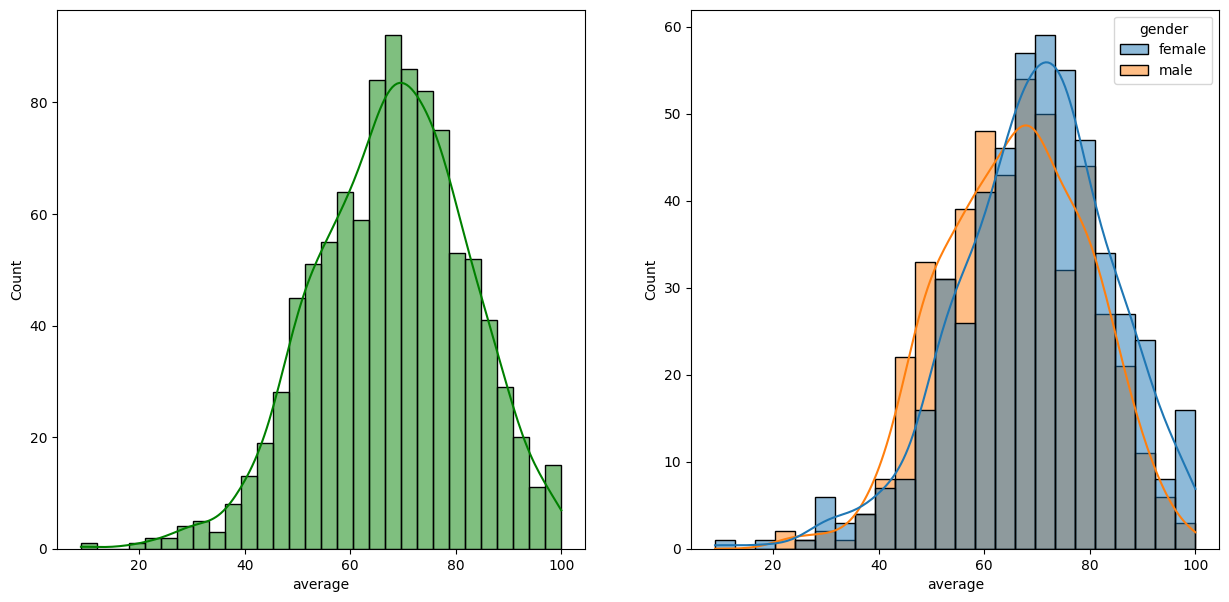

In [80]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

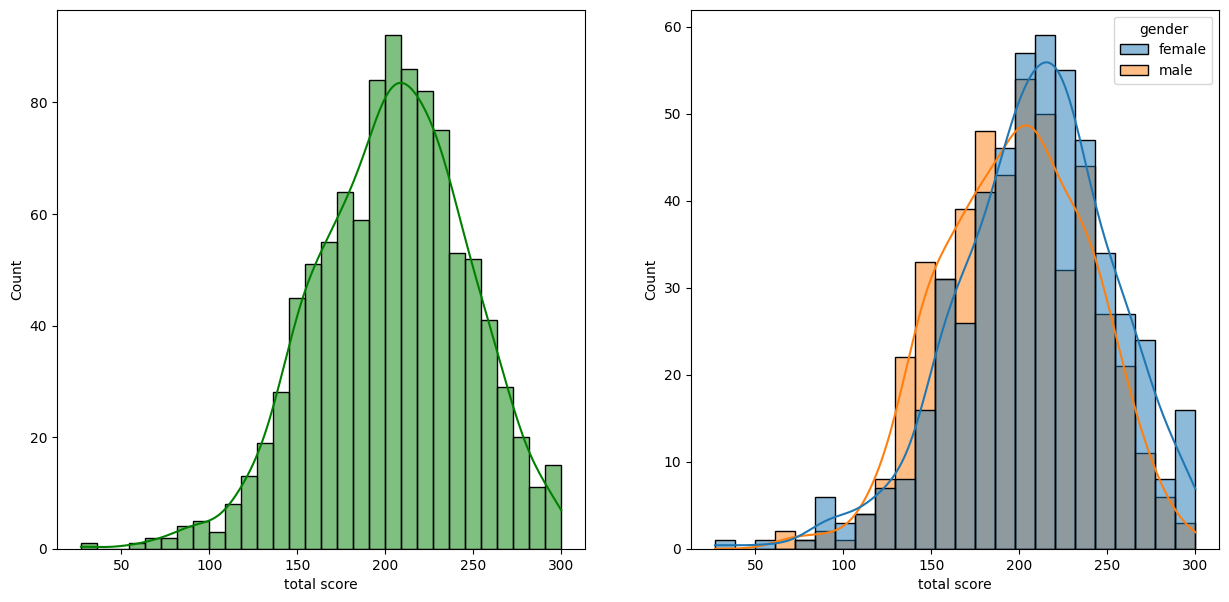

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

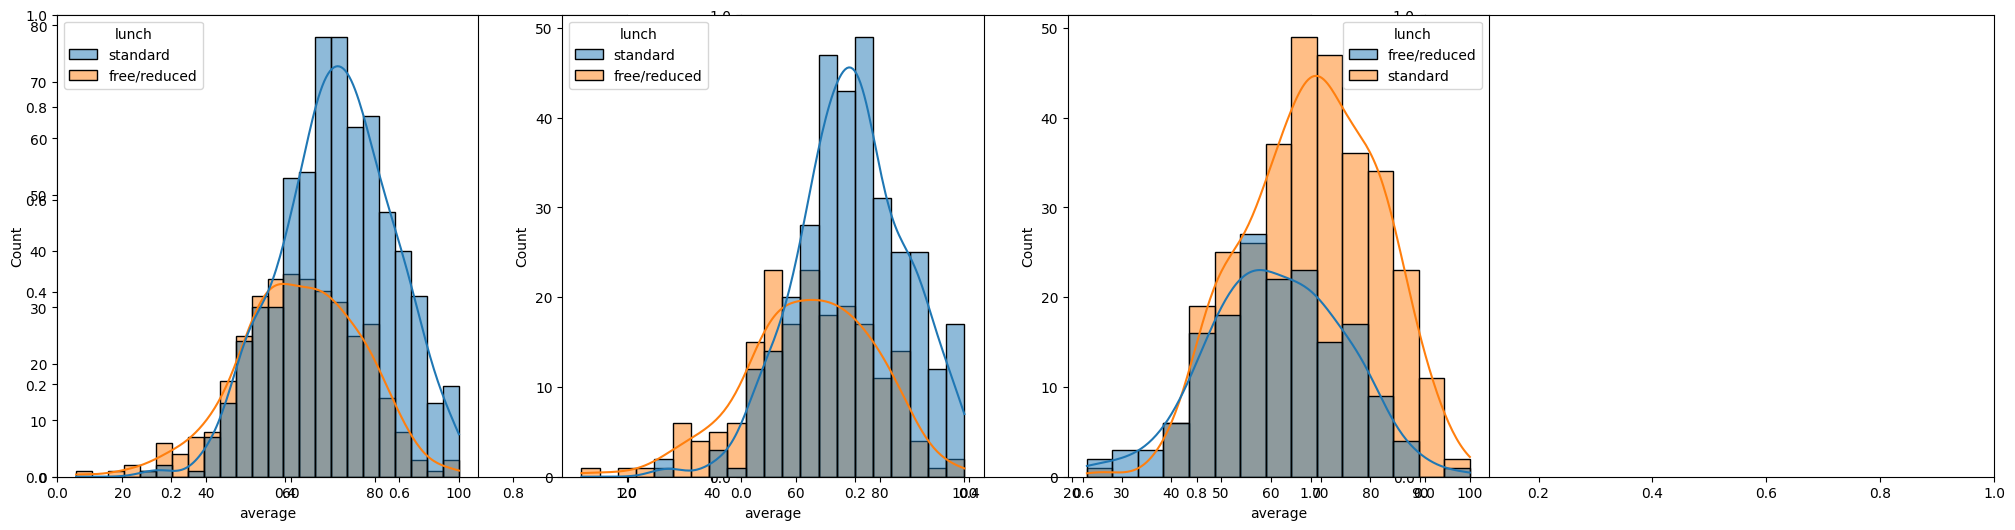

In [82]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

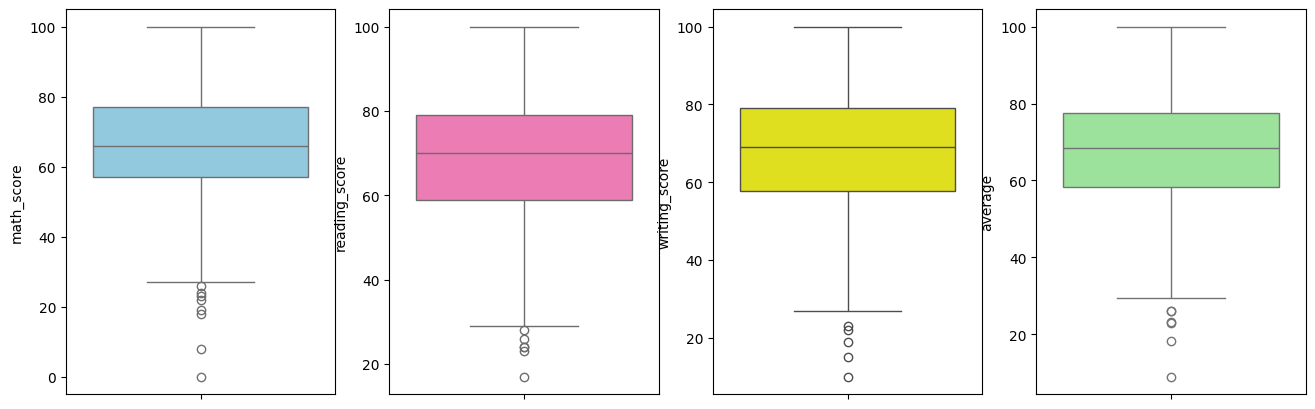

In [84]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

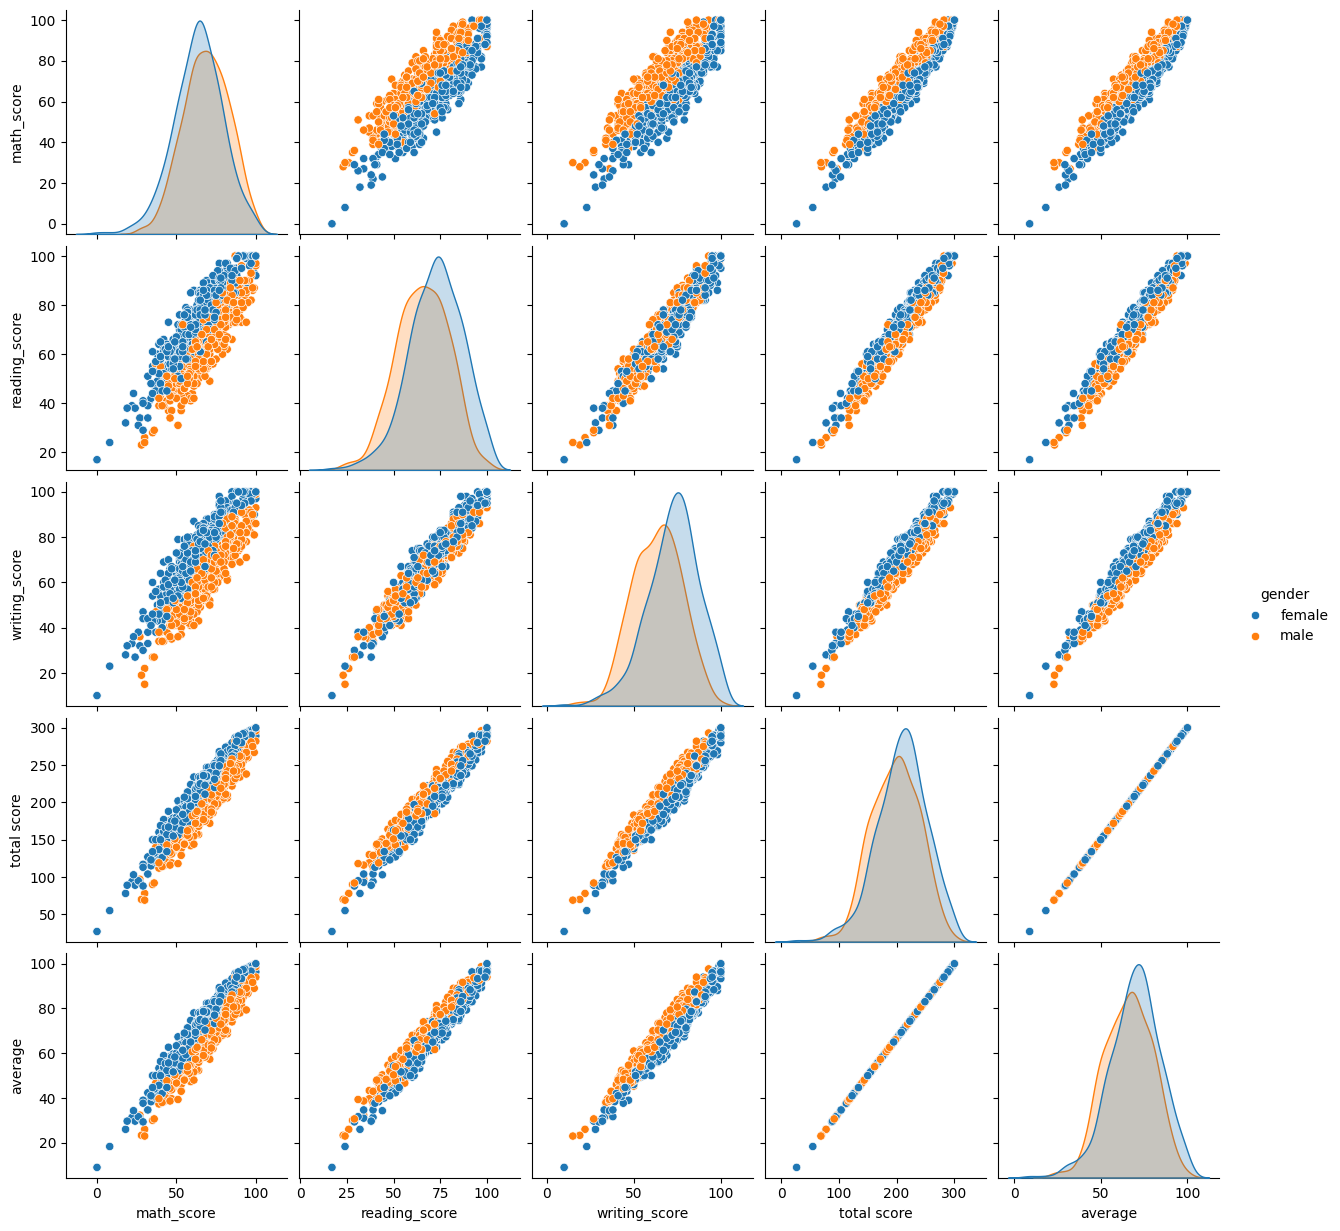

In [87]:
sns.pairplot(df,hue = 'gender')
plt.show()

# Conclusion

* No observable bias between male and female
* group E ethnicity are predominantly the one with the highest math score
* students with 100 in math do very well on other subjects
* As seen in parental education level vs scores, children with parents with higher education tend to do better, but they're are not necesarily the best students
* The The best students does not always finish the test prep course
* Finishing the test course is benefitial but not crucial
* there is a slighty higher number of female top performers and male
* A good standard Lunch before the test has a considerable impact on student's performance
